## Importing Data and Necessary Packages

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

In [3]:
#Creating a python array of state abbreviations
#Taken from https://gist.github.com/JeffPaine/3083347
states = ["US","AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
"SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [4]:
#Create a dictionary object that has states as keys
totallanguage_dict = dict.fromkeys(states)
print(totallanguage_dict) 

{'VT': None, 'NM': None, 'MO': None, 'KY': None, 'IL': None, 'OR': None, 'AZ': None, 'MA': None, 'MN': None, 'ND': None, 'WV': None, 'NC': None, 'PA': None, 'US': None, 'AK': None, 'UT': None, 'MS': None, 'WY': None, 'MI': None, 'AR': None, 'NE': None, 'WA': None, 'WI': None, 'IN': None, 'OH': None, 'TX': None, 'IA': None, 'CA': None, 'FL': None, 'MT': None, 'CO': None, 'NV': None, 'VA': None, 'SC': None, 'LA': None, 'RI': None, 'ME': None, 'DC': None, 'GA': None, 'ID': None, 'OK': None, 'SD': None, 'MD': None, 'KS': None, 'TN': None, 'DE': None, 'NH': None, 'CT': None, 'NY': None, 'NJ': None, 'AL': None, 'HI': None}


In [5]:
english_speakers=pd.Series()
other_speakers=pd.Series()
i=0
for state in states:
    df = pd.read_excel("/home/alli/The-Mother-Tongue-of-US-Communities/raw_data/DetailedLanguageSpoken_State_20062008.xls",state,skiprows=[0,1,2]).dropna()
    totallanguage_dict[state] = df.loc[1:2,"Number of speakers"]
    english_speakers.set_value(i,totallanguage_dict[state].iloc[0])
    other_speakers.set_value(i,totallanguage_dict[state].iloc[1])
    i+=1


/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/home/alli/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [9]:
def createDataFrame(emptySeries, arrayNames, textfileName, index, dictionary):
    """
    Makes a dataframe with specific language information from excel file
    """
    i=0
    for area in arrayNames:
        df = pd.read_excel(textfileName, area, skiprows-[0,1,2]).dropna()
        dictionary[area] = df.loc[1:2, "Number of speakers"]
        emptySeries.set_value(dictionary[area].iloc[index])
        i+=1


In [8]:
print(english_speakers)
print(english_speakers+other_speakers)

0     225488799.0
1       4139666.0
2        533112.0
3       4216116.0
4       2470669.0
5      19456202.0
6       3733134.0
7       2634649.0
8        472111.0
9        711083.0
10     12658319.0
11      7725470.0
12       897745.0
13      1238169.0
14      9353214.0
15      5461088.0
16      2607134.0
17      2323018.0
18      3790556.0
19      3704711.0
20      1151282.0
21      4465318.0
22      4841697.0
23      8576680.0
24      4366556.0
25      2610696.0
26      5169463.0
27       854966.0
28      1492558.0
29      1708944.0
30      1137876.0
31      5861865.0
32      1166401.0
33     12965788.0
34      7596869.0
35       565619.0
36     10081548.0
37      3069427.0
38      3004509.0
39     10593911.0
40       790938.0
41      3863249.0
42       692576.0
43      5407992.0
44     14500388.0
45      2069123.0
46       556818.0
47      6231862.0
48      5027344.0
49      1666936.0
50      4817706.0
51       455728.0
dtype: float64
0     280564877.0
1       4320582.0
2        6304

First we can compare how many people speak a different language than how many people only speak English.

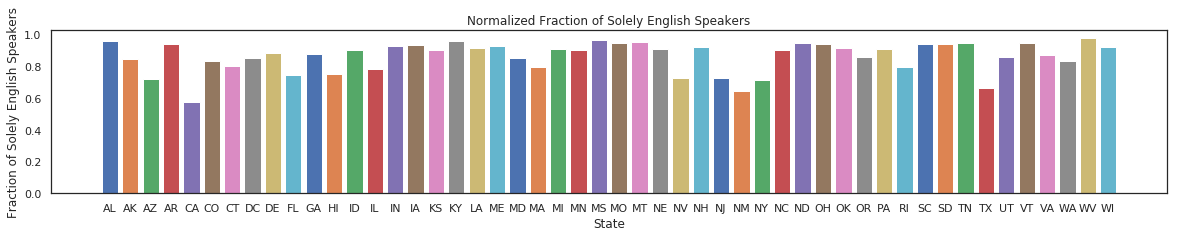

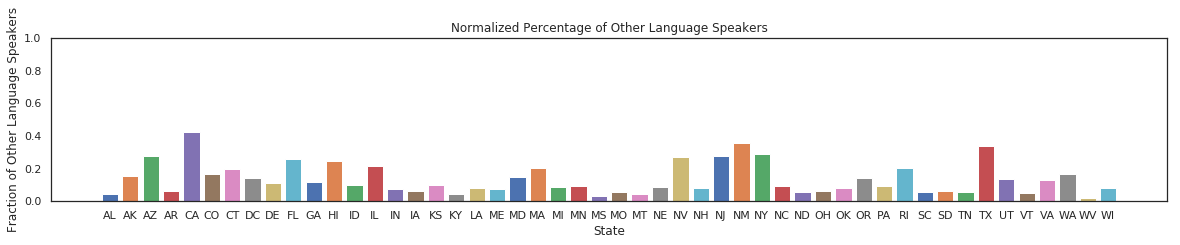

In [16]:
english_speakers_normalized = english_speakers/(english_speakers+other_speakers)
other_speakers_normalized = other_speakers/(english_speakers+other_speakers)

plt.figure(figsize=(20, 3))
for i in range(1,51):
    plt.bar(i, english_speakers_normalized[i])
    plt.autoscale(enable=True)
    plt.xticks(range(1,51), states[1:51])
    plt.title("Normalized Fraction of Solely English Speakers")
    plt.xlabel("State")
    plt.ylabel("Fraction of Solely English Speakers")
    
plt.figure(figsize=(20, 3))
for i in range(1,51):
    plt.bar(i, other_speakers_normalized[i])
    plt.autoscale(enable=True)
    plt.ylim([0.0,1.0])
    plt.xticks(range(1,51), states[1:51])
    plt.title("Normalized Percentage of Other Language Speakers")
    plt.xlabel("State")
    plt.ylabel("Fraction of Other Language Speakers")

These graphs show on top the portion of the population for each state that only speaks English, and on the bottom the portion of the population for each state that speaks a language other than English. 

We see that a large portion of the population of all U.S. states only speak English. 

In [10]:
print("State with Most Only English Speakers :"+str(states[english_speakers_normalized.idxmax()]))

print("State with Most Speakers of Other Languages :"+str(states[other_speakers_normalized.idxmax()]))


State with Most Only English Speakers :WV
State with Most Speakers of Other Languages :CA


In [13]:
print(str(states[other_speakers_normalized.idxmin()]))
print(str(other_speakers_normalized.min()))

WV
0.022828700042617327


In [26]:
index = other_speakers_normalized > 0.2
bleh=[i for i, x in enumerate(index) if x]
for i in bleh:
    print(states[i])

AZ
CA
FL
HI
IL
MA
NV
NJ
NM
NY
RI
TX


In [27]:
index = other_speakers_normalized < 0.05
bleh=[i for i, x in enumerate(index) if x]
for i in bleh:
    print(states[i])

AL
KY
MS
MT
WV


# Looking at Counties of Potential Interesting Areas

Next we will look at counties of states which had some of the most extreme ratios of speakers of only english to speakers of other languages. 

Things to try : 
-plotting this bar graph by urban area
-plotting this bar graph for counties that look like they have extreme ratios( ie AL, CA) to see if ratios are consistent or varied inside these states

However, how diverse is this actually? We stipulate that if all the different languages spoken in a community are European languages, that changes the perception of how diverse the community is. 

take the extremes and show the the different languages for those states (pmf) 